<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/taipei_wordcloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.24 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud Generated from Tf-idf for Clusters (Taipei)**



####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Create a dataframe for each clustering method
4. Method 1: Calculate average tf-idf for each cluster (straightforward method)
5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term
6. Word Cloud with Mask

<br/>

##**1. Read file with clustering results**

---



In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
cluster_result = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/taipei/hierarchical_textcluster_taipei_r.csv')

In [3]:
# cluster size
cluster_method_name = ['cluster_complete_3', 'cluster_complete_4', 'cluster_avg_3', 'cluster_avg_5', 'cluster_ward_3', 'cluster_ward_4']
clusterSizeDf = pd.DataFrame({'cluster':list('12345')})
for i in cluster_method_name:
  c = cluster_result[['c0101', i]].groupby(i).count().reset_index(i)
  clusterSizeDf[i] = c[['c0101']]

clusterSizeDf

,cluster,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_5,cluster_ward_3,cluster_ward_4
0,1,1548.0,1548.0,2044.0,791,2554.0,2554.0
1,2,1874.0,1874.0,836.0,1253,1564.0,1564.0
2,3,2132.0,849.0,2674.0,836,1436.0,682.0
3,4,NaN,1283.0,NaN,665,NaN,754.0
4,5,NaN,NaN,NaN,2009,NaN,NaN


##**2. Tf-idf vectorizer**


---


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', max_df=0.75) # ignore terms that appear in more than 75% of the documents
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十ㄧ年至二十五年屋齡' '二十六年至三十年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他管理形式' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南' '四十年以上屋齡'
 '多戶數' '多方位' '大公設比' '小公設比' '少戶數' '日間管理' '有平面車位' '有機械車位' '東' '東北' '東南'
 '極多戶數' '極少戶數' '無平面車位' '無管理' '臨單線道' '臨多線道' '臨雙線道' '西' '西北' '西南' '近一年有實價登錄'
 '近一年無實價登錄' '重點']


,c0101,content,tfidf,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_5,cluster_ward_3,cluster_ward_4
0,0000251,"東,24小時,重點,三十一年至三十五年屋齡,極多戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.2080988843766643, 0.0, 0.44503364353619185,...",3,4,3,5,1,1
1,0000252,"南,24小時,重點,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2607338181360676, 0.0, 0.0, 0.0, 0.37609808...",3,4,3,5,1,1
2,0000253,"日間管理,一般,二十六年至三十年屋齡,少戶數,大公設比,近一年有實價登錄,臨單線道,有平面車...","[0.0, 0.3140217213782877, 0.0, 0.0, 0.0, 0.0, ...",3,4,3,5,2,2
3,0000254,"南,24小時,重點,二十六年至三十年屋齡,多戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.22997657719849673, 0.0, 0.0, 0.0, 0.3317319...",2,2,3,5,1,1
4,0000260,"東,日間管理,一般,二十六年至三十年屋齡,極少戶數,近一年無實價登錄,臨單線道,有平面車位,...","[0.0, 0.3011514823074077, 0.0, 0.0, 0.0, 0.0, ...",1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...
5549,Y001263,"西北,無管理,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,臨單線道,有平...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2,1,1,2,2
5550,Y001264,"東,東北,24小時,重點,十一年至十五年屋齡,多戶數,大公設比,近一年有實價登錄,臨單線道,...","[0.19615693251521787, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,2,3,5,1,1
5551,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,中公設比,近一年有實價登錄,臨多線道,有平面...","[0.24640004495755438, 0.0, 0.0, 0.0, 0.3554221...",2,2,3,5,1,1
5552,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,有平面車位,無...","[0.2724991091104584, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2,3,5,1,1


##**3. Create a dataframe for each clustering method**


---


In [ ]:
cluster_complete_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_3']]
cluster_complete_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_4']]
cluster_avg_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_3']]
cluster_avg_5 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_5']]
cluster_ward_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_3']]
cluster_ward_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,tfidf,cluster_complete_3
0,0000251,"東,24小時,重點,三十一年至三十五年屋齡,極多戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.2080988843766643, 0.0, 0.44503364353619185,...",3
1,0000252,"南,24小時,重點,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2607338181360676, 0.0, 0.0, 0.0, 0.37609808...",3
2,0000253,"日間管理,一般,二十六年至三十年屋齡,少戶數,大公設比,近一年有實價登錄,臨單線道,有平面車...","[0.0, 0.3140217213782877, 0.0, 0.0, 0.0, 0.0, ...",3
3,0000254,"南,24小時,重點,二十六年至三十年屋齡,多戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.22997657719849673, 0.0, 0.0, 0.0, 0.3317319...",2
4,0000260,"東,日間管理,一般,二十六年至三十年屋齡,極少戶數,近一年無實價登錄,臨單線道,有平面車位,...","[0.0, 0.3011514823074077, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...,...,...
5549,Y001263,"西北,無管理,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,臨單線道,有平...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
5550,Y001264,"東,東北,24小時,重點,十一年至十五年屋齡,多戶數,大公設比,近一年有實價登錄,臨單線道,...","[0.19615693251521787, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
5551,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,中公設比,近一年有實價登錄,臨多線道,有平面...","[0.24640004495755438, 0.0, 0.0, 0.0, 0.3554221...",2
5552,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,有平面車位,無...","[0.2724991091104584, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


##**4. Method 1: Calculate average tf-idf for each cluster (straightforward method)**

*   Regard each observation as a document and calculate tf-idf for each term (just like what we do in [text clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/newtaipei_pca_hierarchical_text.ipynb))

*   Calculate average tf-idf for each cluster


In [ ]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Calculate average tfidf for a cluster
def avgTfidf(clusterdf):
  return clusterdf['tfidf'].to_numpy().mean(axis=0)

# Store feature weights for clusters
cluster_feature_weight_1 = pd.DataFrame(terms, columns=['feature']) 
def clusterFeatureWeight(clusterType,clusterResult,clusterSize):
  for i in range(1,clusterSize+1):
    cluster = clusterdf(clusterResult,clusterType,i)
    cluster_feature_weight_1['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(avgTfidf(cluster))

In [ ]:
clusterFeatureWeight('cluster_complete_3',cluster_complete_3,3)
clusterFeatureWeight('cluster_complete_4',cluster_complete_4,4)
clusterFeatureWeight('cluster_avg_3',cluster_avg_3,3)
clusterFeatureWeight('cluster_avg_5',cluster_avg_5,5)
clusterFeatureWeight('cluster_ward_3',cluster_ward_3,3)
clusterFeatureWeight('cluster_ward_4',cluster_ward_4,4)

cluster_feature_weight_1

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_5_3,avg_5_4,avg_5_5,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.039266,0.216599,0.122677,0.039266,0.216599,0.086075,0.146898,0.051344,0.125541,...,0.125541,0.143576,0.210483,0.203236,0.053108,0.087822,0.203236,0.053108,0.083554,0.091682
1,一般,0.234088,0.029321,0.118897,0.234088,0.029321,0.196822,0.067332,0.227014,0.078292,...,0.078292,0.096388,0.038445,0.049347,0.210189,0.150444,0.049347,0.210189,0.139814,0.160059
2,三十一年至三十五年屋齡,0.111031,0.000968,0.031761,0.111031,0.000968,0.000601,0.052381,0.080770,0.000544,...,0.000544,0.001343,0.037313,0.027800,0.108663,0.000317,0.027800,0.108663,0.000000,0.000603
3,三十六年至四十年屋齡,0.136330,0.002316,0.052926,0.136330,0.002316,0.000000,0.087948,0.063507,0.235330,...,0.235330,0.000593,0.000637,0.000596,0.003220,0.223997,0.000596,0.003220,0.471641,0.000000
4,中公設比,0.041233,0.108185,0.108953,0.041233,0.108185,0.119545,0.101944,0.072733,0.075787,...,0.075787,0.032471,0.132025,0.112481,0.085098,0.054656,0.112481,0.085098,0.058775,0.050931
5,二十ㄧ年至二十五年屋齡,0.037181,0.076262,0.037442,0.037181,0.076262,0.090978,0.002016,0.080134,0.000473,...,0.000473,0.007810,0.055209,0.049246,0.098254,0.000594,0.049246,0.098254,0.000000,0.001131
6,二十六年至三十年屋齡,0.068483,0.021827,0.082724,0.068483,0.021827,0.003307,0.135277,0.080173,0.001046,...,0.001046,0.003483,0.077760,0.055636,0.115586,0.000288,0.055636,0.115586,0.000000,0.000548
7,五年內屋齡,0.023803,0.023424,0.011184,0.023803,0.023424,0.000000,0.018585,0.001193,0.000000,...,0.000000,0.153609,0.000000,0.019041,0.035382,0.000432,0.019041,0.035382,0.000000,0.000822
8,六年至十年屋齡,0.047959,0.094302,0.001893,0.047959,0.094302,0.004754,0.000000,0.000251,0.000000,...,0.000000,0.381989,0.000231,0.098746,0.001791,0.000000,0.098746,0.001791,0.000000,0.000000
9,其他管理形式,0.009861,0.003446,0.007014,0.009861,0.003446,0.001591,0.010603,0.001619,0.006966,...,0.006966,0.038599,0.000933,0.002995,0.016157,0.002615,0.002995,0.016157,0.003719,0.001617


##**5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term**




In [ ]:
# Group contents(row) in the same cluster(column value)
def groupClusterContents(clusterType,clusterResult):
  return clusterResult.groupby(clusterType)['content'].agg(lambda column: ",".join(column)).reset_index()

# tfidf vectorizer
def tfidfVectorize(clusterResult):
  content = np.array(clusterResult['content']) 
  vectorize = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
  tfidfMatrix = vectorize.fit_transform(content)
  # Store vectorized texts in df
  clusterResult['tfidf'] = list(tfidfMatrix.toarray())

# Store feature weights for clusters
cluster_feature_weight_2 = pd.DataFrame(terms, columns=['feature']) 
def createFeatureWeightDF(clusterType,clusterResult):
  for i in range(1,clusterResult.shape[0]+1):
    tfidfweight = clusterResult.iloc[i-1,-1]
    cluster_feature_weight_2['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(tfidfweight)

# Create feature weight dataframe
def method2(clusterType,clusterResult):
  clusterName = clusterType[8:]
  clusterName = groupClusterContents(clusterType,clusterResult)
  tfidfVectorize(clusterName)
  createFeatureWeightDF(clusterType,clusterName)

In [ ]:
method2('cluster_complete_3',cluster_complete_3)
method2('cluster_complete_4',cluster_complete_4)
method2('cluster_avg_3',cluster_avg_3)
method2('cluster_avg_5',cluster_avg_5)
method2('cluster_ward_3',cluster_ward_3)
method2('cluster_ward_4',cluster_ward_4)

cluster_feature_weight_2

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_5_3,avg_5_4,avg_5_5,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.074810,0.395355,0.255800,0.074291,0.394648,0.156484,0.285506,0.097124,0.239356,...,0.237049,0.267693,0.388827,0.386226,0.104747,0.172450,0.383614,0.103626,0.148733,0.161717
1,一般,0.362735,0.044873,0.203439,0.360219,0.044793,0.302500,0.108938,0.353048,0.119953,...,0.118797,0.145456,0.059476,0.076956,0.344168,0.229376,0.076435,0.340487,0.194935,0.217741
2,三十一年至三十五年屋齡,0.101214,0.000945,0.034107,0.100512,0.000943,0.000551,0.051545,0.073493,0.000550,...,0.000545,0.001366,0.034433,0.026436,0.102200,0.000335,0.032117,0.123668,0.000000,0.000706
3,三十六年至四十年屋齡,0.136104,0.002362,0.061008,0.165320,0.002884,0.000000,0.113573,0.061441,0.238255,...,0.235959,0.000683,0.000671,0.000724,0.003821,0.228036,0.000880,0.004623,0.527185,0.000000
4,中公設比,0.057836,0.139815,0.162127,0.057435,0.139565,0.159790,0.140742,0.100196,0.103996,...,0.102994,0.044388,0.172837,0.151195,0.122258,0.077686,0.150172,0.120950,0.075949,0.064687
5,二十ㄧ年至二十五年屋齡,0.034890,0.070380,0.039631,0.034648,0.070254,0.087609,0.002193,0.077037,0.000550,...,0.000644,0.009689,0.062124,0.047984,0.097742,0.000670,0.058294,0.118274,0.000000,0.001413
6,二十六年至三十年屋齡,0.063809,0.023145,0.091031,0.063366,0.023104,0.003306,0.136356,0.077510,0.001100,...,0.001090,0.004097,0.076916,0.057038,0.115890,0.000335,0.069293,0.140234,0.000000,0.000706
7,五年內屋齡,0.016345,0.016060,0.007446,0.019854,0.019608,0.000000,0.013861,0.001217,0.000000,...,0.000000,0.169966,0.000000,0.013761,0.023560,0.000335,0.016718,0.028509,0.000000,0.000706
8,六年至十年屋齡,0.040234,0.080063,0.001922,0.048871,0.097753,0.005392,0.000000,0.000304,0.000000,...,0.000000,0.453975,0.000314,0.109353,0.002460,0.000000,0.127436,0.002855,0.000000,0.000000
9,其他管理形式,0.006915,0.002362,0.005284,0.006867,0.002358,0.001102,0.007311,0.001182,0.004952,...,0.005799,0.029874,0.000793,0.002173,0.011462,0.002009,0.002158,0.011339,0.002532,0.001155


##**6. Word Cloud with Mask**


---



In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Madarin
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-25 07:40:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.145.101, 142.250.145.100, 142.250.145.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mnlrnh9nfmf1e552bqtr6b5mu8pur5kk/1650872400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-25 07:40:13--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mnlrnh9nfmf1e552bqtr6b5mu8pur5kk/1650872400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|173.194.69

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload mask image from local device
uploaded = files.upload()
housemask = np.array(Image.open(BytesIO(uploaded['house1.jpg'])))

Saving house1.jpg to house1.jpg


In [ ]:
# Create feature weight dictionary
def featureWeightDict(method,column):
  feature_weight = pd.DataFrame(method['feature'])
  feature_weight[column] = method[column]
  return feature_weight.set_index('feature')[column].to_dict()

# Word cloud
def createWordCloud(dictionary):
  return WordCloud(margin=0, font_path=font, background_color='white', max_words=15, width=housemask.shape[1], height=housemask.shape[0], mask = housemask).generate_from_frequencies(dictionary)

# Show cloud
def showWordCloud(cloud,size,num):
  ax = fig.add_subplot(1, size, num)
  ax.imshow(cloud, interpolation='bilinear')
  ax.axis("off")

# Create cluster word cloud
def createClusterWC(method,clusterList):
  num = 0
  for i in clusterList:
    num = num+1
    fwdict = featureWeightDict(method,i)
    wc = createWordCloud(fwdict)
    showWordCloud(wc,len(clusterList),num)


###**3.1 Complete-Link Cluster**

####3 clusters

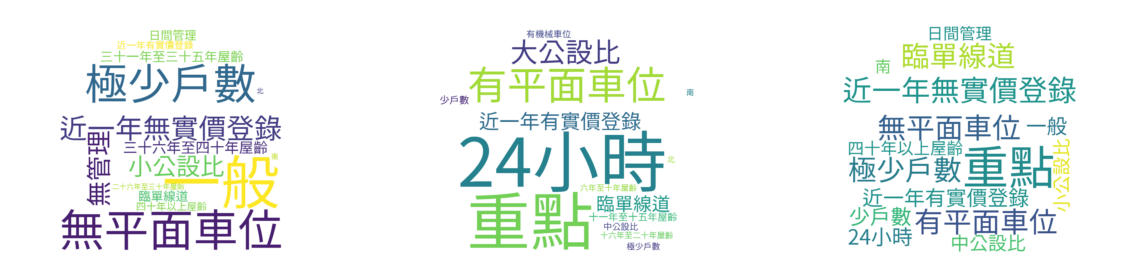

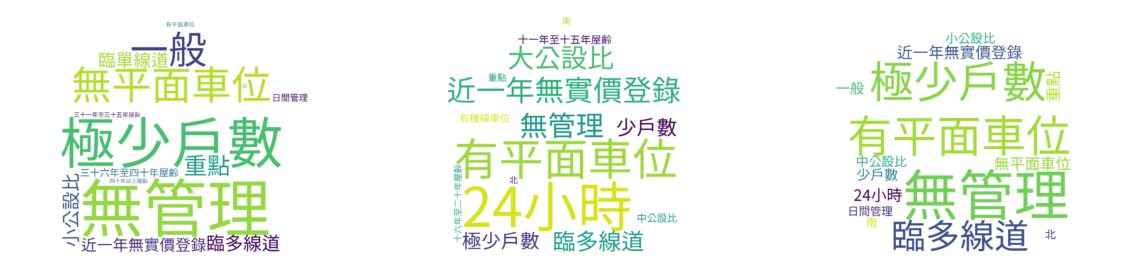

In [ ]:
complete3_list = ['complete_3_1','complete_3_2','complete_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete3_list)

####4 clusters

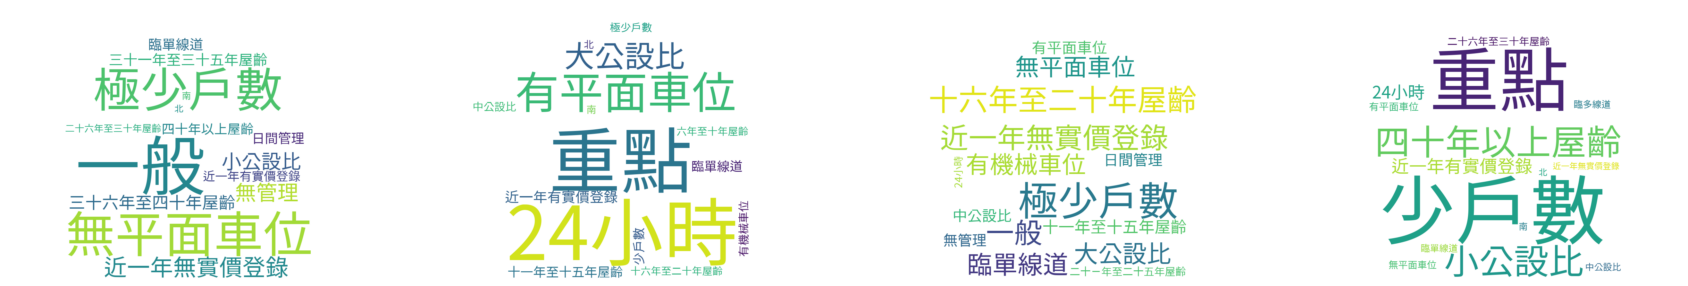

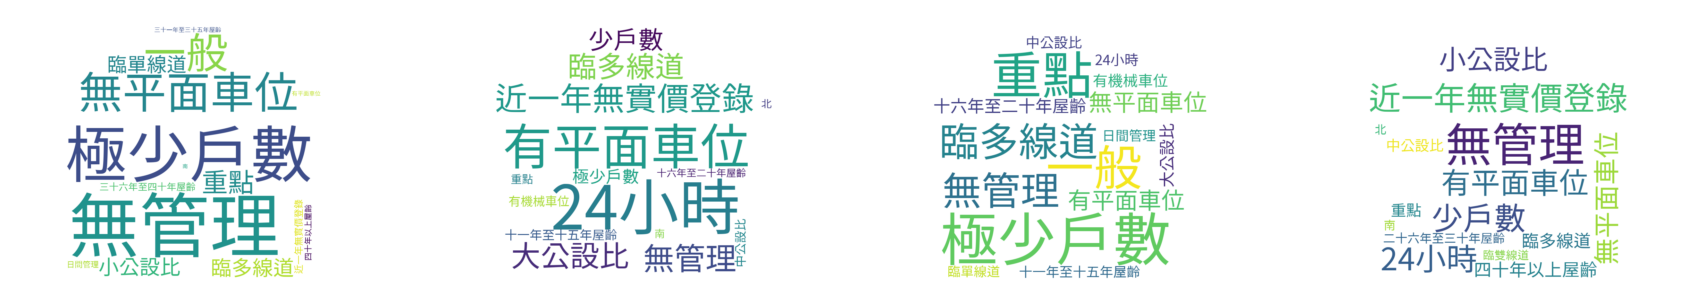

In [ ]:
complete4_list = ['complete_4_1','complete_4_2','complete_4_3','complete_4_4']

# Method 1
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_1, complete4_list)

# Method 2
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_2, complete4_list)

###**3.2 Group Average Cluster**

####3 clusters

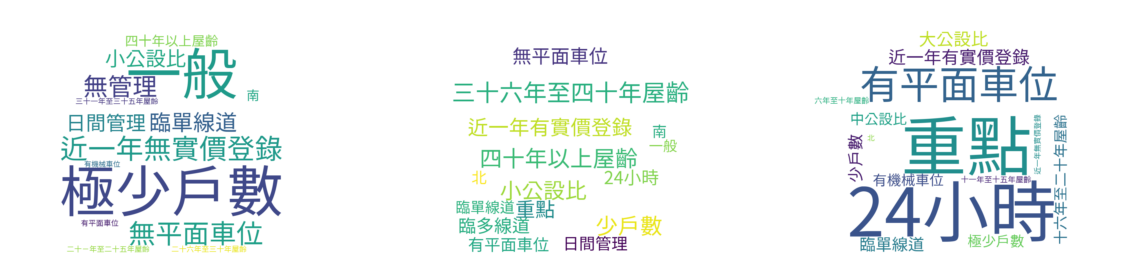

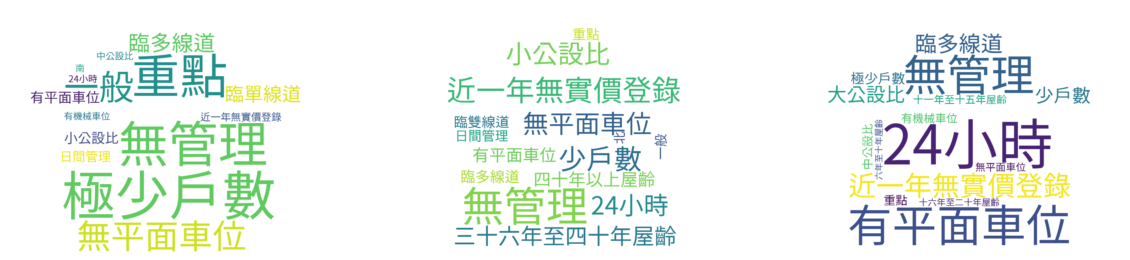

In [ ]:
avg3_list = ['avg_3_1','avg_3_2','avg_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg3_list)

####5 clusters

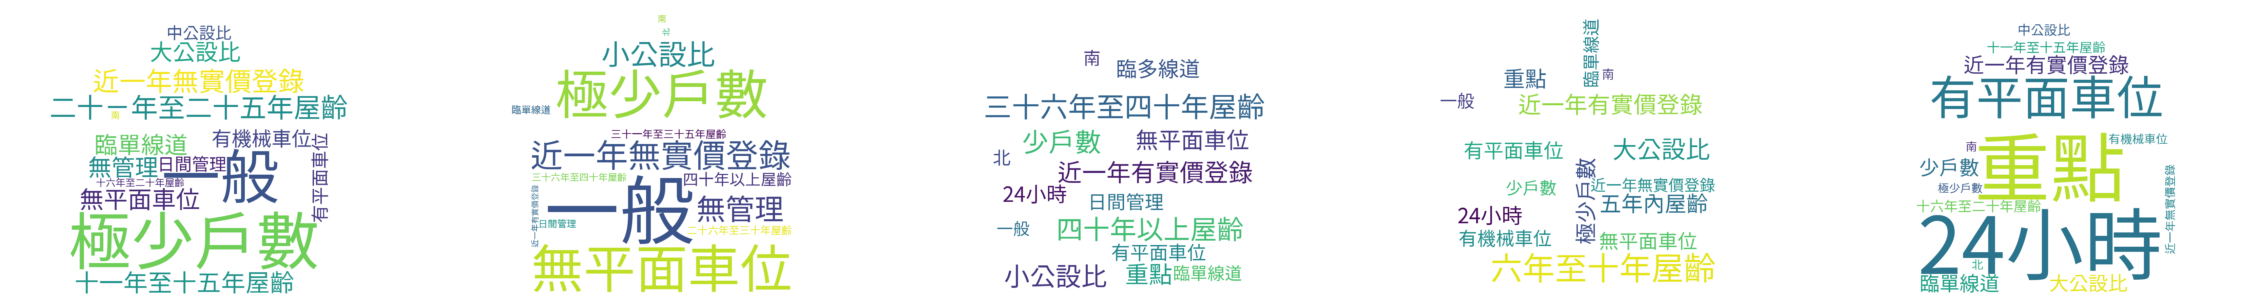

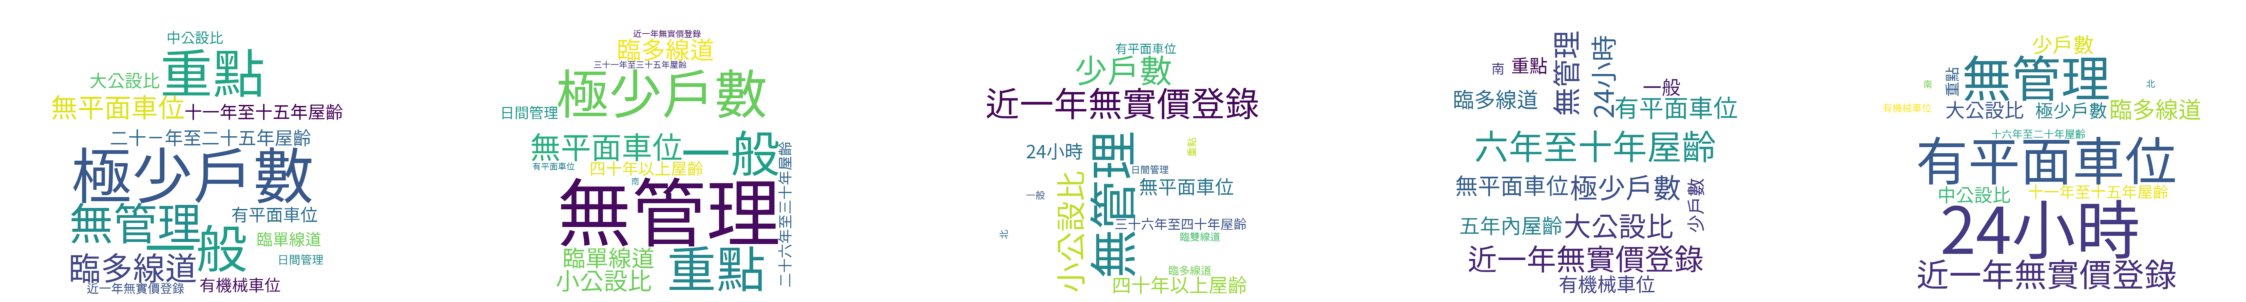

In [ ]:
avg5_list = ['avg_5_1','avg_5_2','avg_5_3','avg_5_4','avg_5_5']

# Method 1
fig = plt.figure(figsize=(40, 10))
createClusterWC(cluster_feature_weight_1, avg5_list)

# Method 2
fig = plt.figure(figsize=(40, 10))
createClusterWC(cluster_feature_weight_2, avg5_list)

###**3.3 Ward Cluster**

####3 clusters

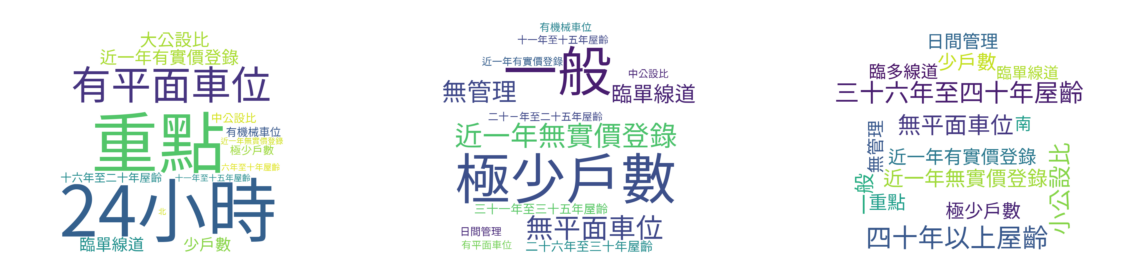

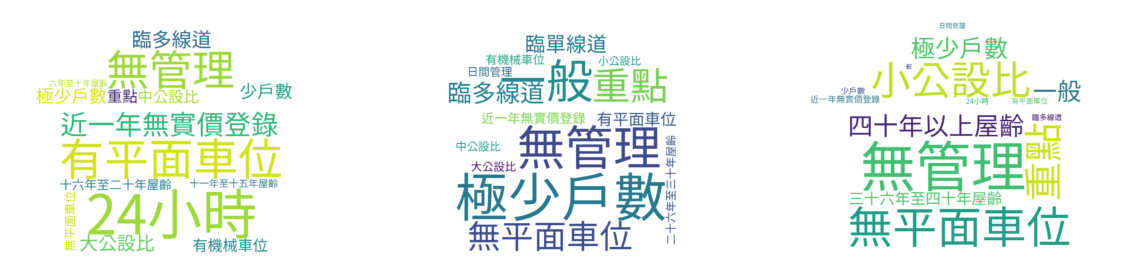

In [ ]:
ward3_list = ['ward_3_1','ward_3_2','ward_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward3_list)

####4 clusters

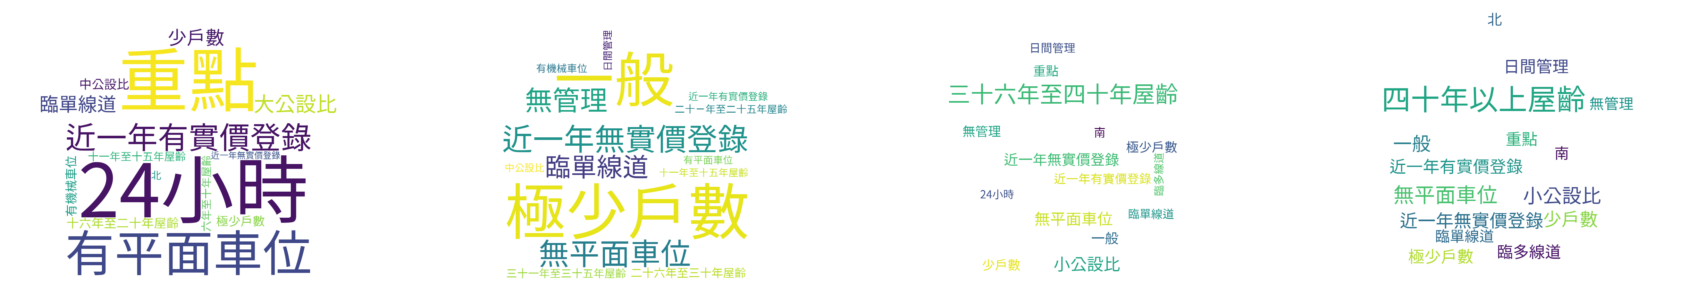

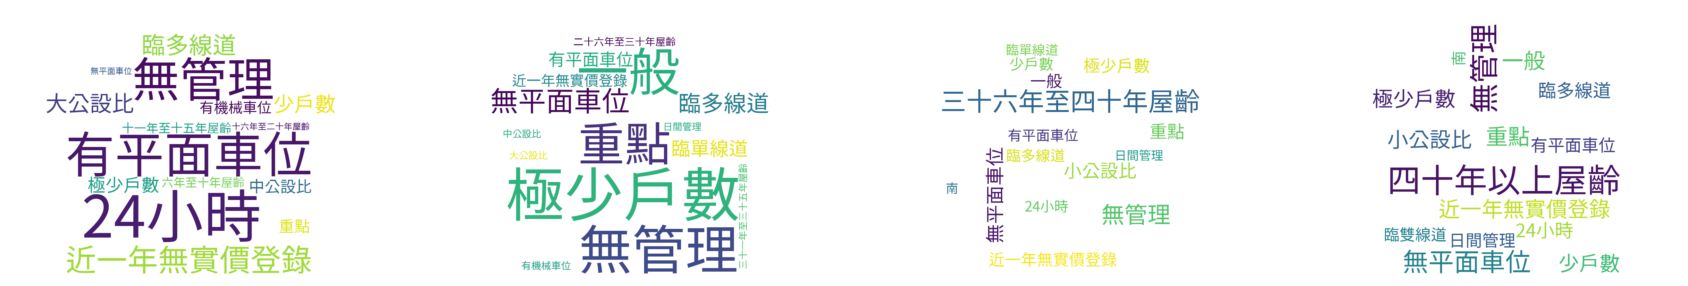

In [ ]:
ward4_list = ['ward_4_1','ward_4_2','ward_4_3','ward_4_4']

# Method 1
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_1, ward4_list)

# Method 2
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_2, ward4_list)